In [1]:
import pandas as pd
df = pd.read_csv('bike.csv')

In [2]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,days_since_2011
0,SPRING,2011,JAN,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,8.175849,80.5833,10.749882,985,0
1,SPRING,2011,JAN,NO HOLIDAY,SUN,NO WORKING DAY,MISTY,9.083466,69.6087,16.652113,801,1
2,SPRING,2011,JAN,NO HOLIDAY,MON,WORKING DAY,GOOD,1.229108,43.7273,16.636703,1349,2
3,SPRING,2011,JAN,NO HOLIDAY,TUE,WORKING DAY,GOOD,1.400000,59.0435,10.739832,1562,3
4,SPRING,2011,JAN,NO HOLIDAY,WED,WORKING DAY,GOOD,2.666979,43.6957,12.522300,1600,4
...,...,...,...,...,...,...,...,...,...,...,...,...
726,SPRING,2012,DEZ,NO HOLIDAY,THU,WORKING DAY,MISTY,3.945849,65.2917,23.458911,2114,726
727,SPRING,2012,DEZ,NO HOLIDAY,FRI,WORKING DAY,MISTY,3.906651,59.0000,10.416557,3095,727
728,SPRING,2012,DEZ,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,3.906651,75.2917,8.333661,1341,728
729,SPRING,2012,DEZ,NO HOLIDAY,SUN,NO WORKING DAY,GOOD,4.024151,48.3333,23.500518,1796,729


In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
lm = LinearRegression()
feature_of_interest = ['season','holiday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'days_since_2011']


# one-hot编码

In [5]:
X = pd.get_dummies(df[feature_of_interest])
y = df['cnt']
X

,temp,hum,windspeed,days_since_2011,season_FALL,season_SPRING,season_SUMMER,season_WINTER,holiday_HOLIDAY,holiday_NO HOLIDAY,workingday_NO WORKING DAY,workingday_WORKING DAY,weathersit_GOOD,weathersit_MISTY,weathersit_RAIN/SNOW/STORM
0,8.175849,80.5833,10.749882,0,0,1,0,0,0,1,1,0,0,1,0
1,9.083466,69.6087,16.652113,1,0,1,0,0,0,1,1,0,0,1,0
2,1.229108,43.7273,16.636703,2,0,1,0,0,0,1,0,1,1,0,0
3,1.400000,59.0435,10.739832,3,0,1,0,0,0,1,0,1,1,0,0
4,2.666979,43.6957,12.522300,4,0,1,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,3.945849,65.2917,23.458911,726,0,1,0,0,0,1,0,1,0,1,0
727,3.906651,59.0000,10.416557,727,0,1,0,0,0,1,0,1,0,1,0
728,3.906651,75.2917,8.333661,728,0,1,0,0,0,1,1,0,0,1,0
729,4.024151,48.3333,23.500518,729,0,1,0,0,0,1,1,0,1,0,0


# 模型训练


In [6]:
model =lm.fit(X,df['cnt'])

In [7]:
model.predict(X)

array([ 1067.8616389 ,  1113.05344875,  1203.14803752,  1211.53765111,
        1547.65367335,  1570.9026751 ,   964.22581849,   336.31196708,
         487.53210444,   992.73252636,   647.80249145,   682.09470679,
         881.53430515,  1244.74246977,  1100.82038481,  1415.75153614,
         -44.66779204,   555.02140872,   985.94209593,  1220.94979946,
         860.35214754,   739.96904763,   663.4142191 ,   953.26323981,
        1098.54692122, -1343.75046513,  1262.49098456,   721.77428299,
        1127.68057409,  1317.60352423,   765.6717882 ,   818.83232485,
         669.49170616,  1222.09303131,  1145.19520708,   447.45563493,
        1786.89927393,  1822.18596584,  1009.23395879,   755.05819978,
        1194.61369648,  1635.46400592,  1353.54021454,  1834.6597112 ,
        2171.37715727,  1868.72056594,  2068.2375434 ,  2605.04318461,
        2937.13578351,  2060.16041407,  1899.62060139,   349.65757518,
        1281.62554772,  2050.37112013,  1138.31252471,  1201.43046576,
      

# R squared

In [8]:
model.score(X,y)

0.7935505773156581

# 关于模型的参数,参数的方差的思考

考虑 最小二乘问题, 参数其实是$$X_{1},X_{2},,,X_{n}$$的函数,因而也是$\color{#FF0000}{随机变量}$,这个理解对吗?

感觉这个理解不对,参数应该是内在固定的,通过抽样估计出来近似的值

 # 书上的例子
 可以看出我们的权重,SE,t统计量的绝对值都是接近的

In [9]:
!pip install statsmodels

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [10]:
import statsmodels.api as sm
# OLS 是最小二乘的英文缩写
est = sm.OLS(y, X)
est2 = est.fit()
summary = est2.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     251.2
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          1.05e-237
Time:                        01:30:00   Log-Likelihood:                -5993.0
No. Observations:                 731   AIC:                         1.201e+04
Df Residuals:                     719   BIC:                         1.207e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
temp                         110.7096      7.043     15.718      0.000      96.882     124.537
hum                          -17.3772      3.169     -5.483      0.000     -23.600     -11.155
windspeed                    -42.5135      6.892     -6.169      0.000     -56.044     -28.983
days_since_2011                4.9264      0.173     28.507      0.000       4.587       5.266
season_FALL                   44.6918    108.564      0.412      0.681    -168.449     257.832
season_SPRING                -93.5236     87.527     -1.069      0.286    -265.363      78.315
season_SUMMER                805.7945     80.247     10.041      0.000     648.247     963.342
season_WINTER                332.0792     85.039      3.905      0.000     165.125     499.034
holiday_HOLIDAY              201.4632    161.316      1.249      0.212    -115.244     518.171
holiday_NO HOLIDAY           887.5786    115.731      7.669      0.000     660.368    1114.789
workingday_NO WORKING DAY    482.0605    103.037      4.679      0.000     279.772     684.349
workingday_WORKING DAY       606.9814    104.011      5.836      0.000     402.780     811.183
weathersit_GOOD             1123.3268     72.514     15.491      0.000     980.963    1265.691
weathersit_MISTY             743.9282     91.915      8.094      0.000     563.475     924.381
weathersit_RAIN/SNOW/STORM  -778.2132    180.831     -4.304      0.000   -1133.232    -423.194
==============================================================================
Omnibus:                       91.525   Durbin-Watson:                   0.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.706
Skew:                          -0.719   Prob(JB):                     5.25e-43
Kurtosis:                       5.079   Cond. No.                     4.68e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.06e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# 可视化解释

## 权重图
权重表的信息 (权重和⽅差估计) 可以在权重图中可视化。下图显⽰了先前线性回归模型的结果。
权重图显⽰，下⾬/下雪/暴风⾬天⽓对预测的⾃⾏车数量有很⼤的负效应。“⼯作⽇” 特征
(workingday) 的权重接近于零，并且 95% 的区间中包含零，这意味着该效应在统计上不显著。⼀
些置信区间很短，估计值接近于零，但特征效应在统计上是显着的。温度就是这样的⼀个例⼦。权重图的问题在于特征是在不同的尺度上测量的。虽然对于天⽓状况，估计的权重反映了好天⽓和下
⾬/暴风⾬/下雪天⽓之间的差异，但温度只反映了 1 摄⽒度的增加。在拟合线性模型之前，可以通
过缩放特征 (0 均值和 1 标准差)，使估计的权重更具可⽐性。

In [11]:
conf_int = est2.conf_int()
features = conf_int.index.values.tolist()

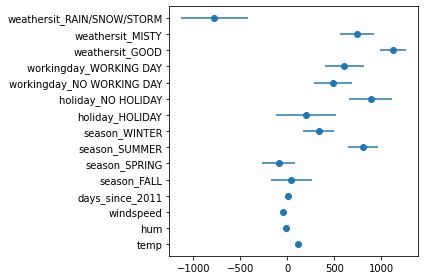

In [13]:
import matplotlib.pylab as plt
xerr = (conf_int.values[:, 1] -conf_int.values[:,0])/2.0
coef = est2.params.values
plt.errorbar(x=coef, y=features ,xerr=xerr,marker='o',ls='none')
plt.tight_layout()

# plt.plot([0 for _ in features],features)

# 疑问
和书上的参数估计值比起来，还是有些特征的权值有出入,如workingday_WORKING_DAY的估计值有明显的区别

看statsmodel的实现, 参数求解主要是分析求解,即通过求伪逆或ＱＲ特征分解完成，而不是我们熟知的迭代解法.

## 效应图

当线性回归模型的权重与实际特征值相乘时，可以更有意义地进⾏分析。权重取决于特征的⽐例，
⽐如有⼀个测量⼈的⾝⾼的特征，如果测量单位从⽶转换到厘⽶，那么权重会有所不同。权重会改
变，但在数据中的实际效应不会改变。了解数据中特征的分布也是很重要的，因为如果⽅差⾮常⼩，
这意味着这个特征⼏乎在所有的实例中都有类似的贡献。效应图可以帮助了解权重和特征的组合对
数据预测的贡献程度。⾸先计算特征效应 (也可称特征影响)，即每个特征的权重乘以实例的特征
值：

$$\text{effect}_{j}^{(i)}=w_{j}x_{j}^{(i)}$$

使⽤箱线图可以可视化效应。

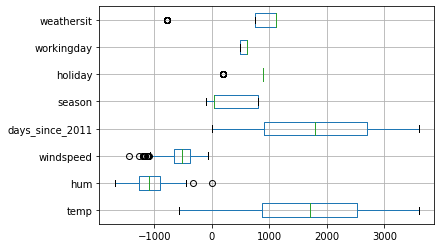

In [14]:
weights = est2.params
effects = X.mul(weights, axis=1)

# 合并分类特征
feature_mappings = {k:[] for k in feature_of_interest }

for col_name in weights.index:
    for feature in feature_of_interest:
        if col_name.startswith(feature) and col_name != feature:
            feature_mappings[feature].append(col_name)

for feature in feature_mappings:
    if len(feature_mappings[feature]):
        effects[feature] = df.apply(lambda row: 0, axis = 1) 
    for col_name in feature_mappings[feature]:
        effects[feature] += effects[col_name]
        del effects[col_name]
effects.boxplot(vert=False)

# 解释单个实例预测


In [17]:
df.iloc[5]

season                  SPRING
yr                        2011
mnth                       JAN
holiday             NO HOLIDAY
weekday                    THU
workingday         WORKING DAY
weathersit                GOOD
temp                   1.60436
hum                    51.8261
windspeed              6.00087
cnt                       1606
days_since_2011              5
Name: 5, dtype: object

In [18]:
effects.iloc[5]

temp                177.617581
hum                -900.592465
windspeed          -255.117749
days_since_2011      24.632159
season              -93.523649
holiday             887.578643
workingday          606.981392
weathersit         1123.326763
Name: 5, dtype: float64